<a href="https://colab.research.google.com/github/jkeza1/Maternal_Health_Summative/blob/main/Summative_Intro_to_ml_Keza_Joan_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                           classification_report, confusion_matrix, ConfusionMatrixDisplay,
                           roc_curve, auc)
from joblib import dump
from sklearn.datasets import make_classification

# TensorFlow/Keras imports
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import HeNormal
from typing import Literal, Optional
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# The Dataset
Problem Statement
Unplanned pregnancies among single mothers in Rwanda contribute to cycles of poverty, school dropouts, and poor health outcomes. While existing platforms (e.g., RapidSMS, Babyl Rwanda) provide general health tracking, they lack personalized, predictive tools for vulnerable women. Current AI solutions in maternal health rely on hospital-grade data, making them ineffective for community-level interventions in low-resource settings like Rwanda.

This project aims to:
1. Predict pregnancy risk within the next year using locally relevant data

2. Integrate with Rwanda’s SMEEF platform for proactive interventions

3. Empower single mothers through early, data-driven support

Dataset Description
The model will leverage health and lifestyle data from Rwandan women, including:

Key Features (Examples)
Demographics: Age, marital status, education level

Health Metrics:

Menstrual cycle regularity

Contraceptive use (type, consistency)

Existing medical conditions (e.g., anemia, hypertension)

Behavioral/Socioeconomic Factors:

Access to healthcare

Employment status

Household size

Geographic location (urban/rural)

Target Variable
Binary Classification:

1: High risk of pregnancy in the next 12 months

0: Low risk


In [ ]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
#this if from my drive in my google colab notebook,which mean it can run only on my end


In [ ]:
df = pd.read_csv('.../Maternal Health Risk Data Set.csv')
#it will run when you download it and use correct path which will also run on your end

In [ ]:
df['BP_Ratio'] = df['SystolicBP'] / (df['DiastolicBP'] + 1e-5)  # Avoid division by zero
df['Temp_HR_Product'] = df['BodyTemp'] * df['HeartRate']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])  # 0=Low, 1=Medium, 2=High

In [ ]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [ ]:
# Data splitting (as you already have)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,
    stratify=y_train_val,
    random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)


In [ ]:

print("Training RandomForest with GridSearch...")
rf_grid.fit(X_train_scaled, y_train)

Training RandomForest with GridSearch...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)


best_rf = rf_grid.best_estimator_
print(f"Best params: {rf_grid.best_params_}")

In [ ]:
y_pred_rf = best_rf.predict(X_test_scaled)
print("\nRandomForest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")


RandomForest Performance:
Accuracy: 0.8374
F1-Score: 0.8384


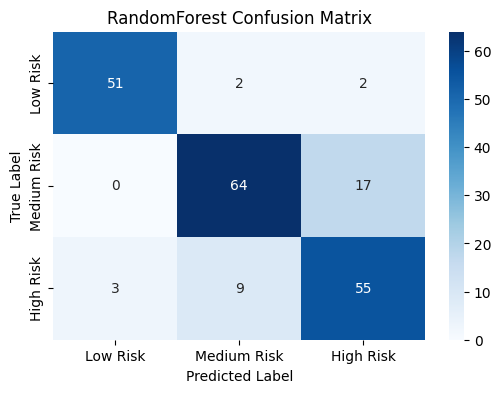

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'Medium Risk', 'High Risk'],
            yticklabels=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('RandomForest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [ ]:
dump(best_rf, 'saved_models/best_randomforest.joblib')
dump(scaler, 'saved_models/scaler.joblib')
print("Model saved as 'saved_models/best_randomforest.joblib'")

Model saved as 'saved_models/best_randomforest.joblib'


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Low Risk', 'Medium Risk', 'High Risk']))


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.94      0.93      0.94        55
 Medium Risk       0.85      0.79      0.82        81
   High Risk       0.74      0.82      0.78        67

    accuracy                           0.84       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



# SECTION 1: Model Architecture:

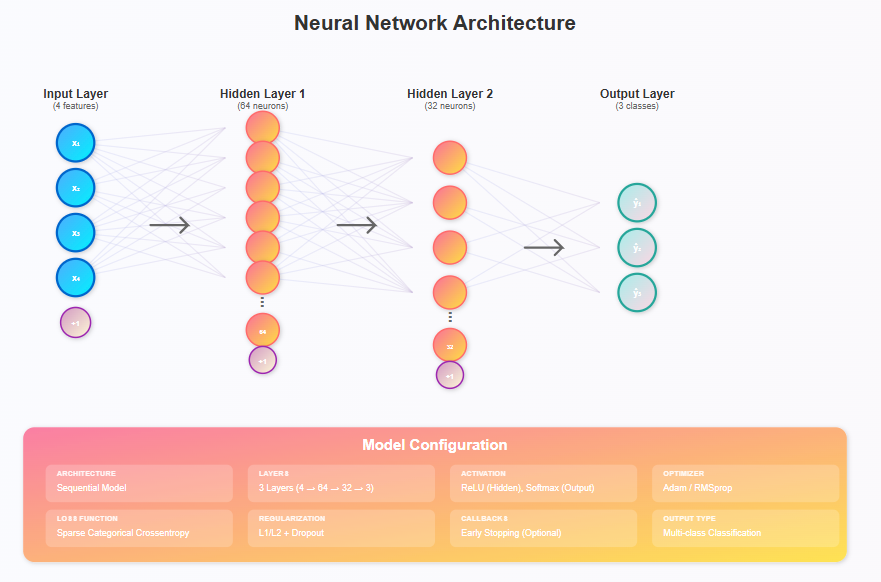

#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

def define_model(input_shape,
                 optimizer_name='adam',
                 regularization_type=None,
                 early_stopping=False,
                 dropout=0.0,
                 learning_rate=0.001,
                 epochs=20,
                 X_train=None,
                 y_train=None,
                 X_val=None,
                 y_val=None,
                 model_name='model'):

    # Define regularizer
    regularizer = None
    if regularization_type == 'l1':
        regularizer = l1(0.01)
    elif regularization_type == 'l2':
        regularizer = l2(0.01)

    # Choose optimizer
    if optimizer_name.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam' or 'rmsprop'.")

    # Build model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape, kernel_regularizer=regularizer))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(3, activation='softmax'))

    num_layers = 3

    # Compile model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True))

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    config = {
        'model_name': model_name,
        'optimizer_name': optimizer_name,
        'regularization_type': regularization_type,
        'early_stopping': early_stopping,
        'dropout': dropout,
        'learning_rate': learning_rate,
        'epochs_planned': epochs,
        'epochs_trained': len(history.history['loss']),
        'num_layers': num_layers,
        'history': history.history
    }

    return model, history, config


In [ ]:
model1, history1, config1 = define_model(
    input_shape=(X_train_scaled.shape[1],),
    optimizer_name='adam',
    regularization_type=None,
    early_stopping=False,
    dropout=0,
    learning_rate=0.001,
    epochs=20,
    X_train=X_train_scaled,
    y_train=y_train,
    X_val=X_val_scaled,
    y_val=y_val,
    model_name='model1_baseline'
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3857 - loss: 1.0935 - val_accuracy: 0.6108 - val_loss: 0.9633
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5827 - loss: 0.9424 - val_accuracy: 0.6798 - val_loss: 0.8679
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6243 - loss: 0.8730 - val_accuracy: 0.6946 - val_loss: 0.8134
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6860 - loss: 0.7883 - val_accuracy: 0.6946 - val_loss: 0.7736
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6420 - loss: 0.7774 - val_accuracy: 0.6847 - val_loss: 0.7493
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6901 - loss: 0.7126 - val_accuracy: 0.6798 - val_loss: 0.7345
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6697 - loss: 0.7171 - val_accuracy: 0.6798 - val_loss: 0.7233
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6678 - loss: 0.7017 - val_accuracy: 0.6700 - val_loss: 0.7143
Ep

In [ ]:
def make_predictions_with_metrics(model_path, X, y_true=None):
    """
    Loads a model from file and computes predictions and optional accuracy.
    """
    result = {
        'predictions': None,
        'accuracy': None,
        'error': None
    }

    if model_path is None or not isinstance(model_path, (str, bytes, os.PathLike)):
        result['error'] = "Invalid model path"
        return result

    if not os.path.exists(model_path):
        result['error'] = f"Model file not found at {model_path}"
        return result

    try:
        model = load_model(model_path)
        predictions_prob = model.predict(X, verbose=0)
        predictions = (predictions_prob > 0.5).astype(int)
        result['predictions'] = predictions

        if y_true is not None:
            result['accuracy'] = accuracy_score(y_true, predictions)

    except Exception as e:
        result['error'] = f"Prediction failed: {str(e)}"

    return result


# Task: Print out the Final Model Accuracy and plot the Loss curve

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Validation Accuracy: 0.6897

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.76      0.76      0.76        54
     Class 1       0.72      0.80      0.76        82
     Class 2       0.58      0.49      0.53        67

    accuracy                           0.69       203
   macro avg       0.69      0.69      0.68       203
weighted avg       0.68      0.69      0.68       203

Final Validation Accuracy: 0.6897


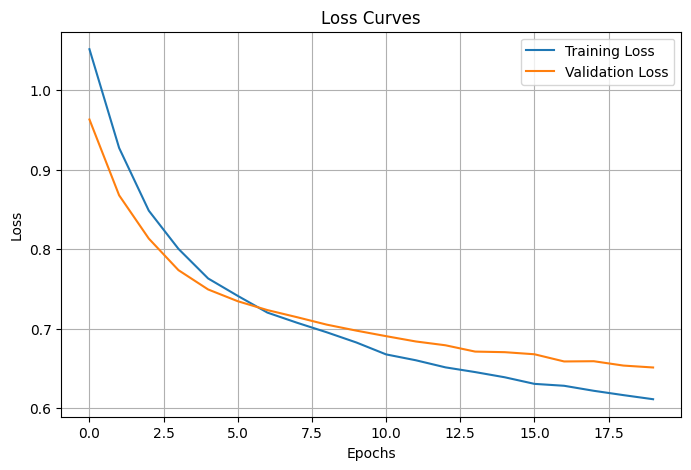

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Predict class probabilities (shape: [samples, 3])
y_val_pred_prob = model1.predict(X_val_scaled)

# Get predicted class indices (0, 1, or 2)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Detailed report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=['Class 0', 'Class 1', 'Class 2']))
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

# 2. Plot training and validation loss curves
plt.figure(figsize=(8, 5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

def evaluate_model(model, X_val, y_val, config=None):
    # Get raw predictions
    preds = model.predict(X_val)

    # Log shapes for sanity check
    print("Predictions shape:", preds.shape)
    print("y_val shape:", y_val.shape)

    # Multiclass prediction: take the class with highest probability
    if preds.ndim == 2 and preds.shape[1] > 1:
        y_pred = np.argmax(preds, axis=1)
    else:
        raise ValueError("Expected multiclass probabilities with shape (n_samples, n_classes).")

    # Validate prediction length
    if len(y_pred) != len(y_val):
        raise ValueError(f"Shape mismatch: predicted {len(y_pred)} samples, but y_val has {len(y_val)}.")

    # Safe config getter
    def get_config(key, default='N/A'):
        return config.get(key, default) if config else default

    # Evaluation metrics
    metrics = {
        'Model Name': get_config('model_name', 'unnamed_model'),
        'Optimizer': get_config('optimizer_name', 'N/A'),
        'Regularizer': get_config('regularization_type', 'None'),
        'Early Stopping': 'Yes' if get_config('early_stopping', False) else 'No',
        'Learning Rate': get_config('learning_rate', 'N/A'),
        'Epochs Planned': get_config('epochs_planned', 'N/A'),
        'Epochs Trained': get_config('epochs_trained', 'N/A'),
        'Num Layers': get_config('num_layers', 'N/A'),
        'Dropout': get_config('dropout', 0),
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_val, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_val, y_pred, average='weighted', zero_division=0),
        'Training Accuracy': get_config('history', {}).get('accuracy', [None])[-1],
        'Validation Accuracy': get_config('history', {}).get('val_accuracy', [None])[-1],
        'Training Loss': get_config('history', {}).get('loss', [None])[-1],
        'Validation Loss': get_config('history', {}).get('val_loss', [None])[-1]
    }

    # Display results
    print(f"\n=== Evaluation Metrics for {metrics['Model Name']} ===")
    print("\nClassification Report:\n", classification_report(y_val, y_pred))
    print("\nDetailed Metrics:")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {metrics['Model Name']}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    return None


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


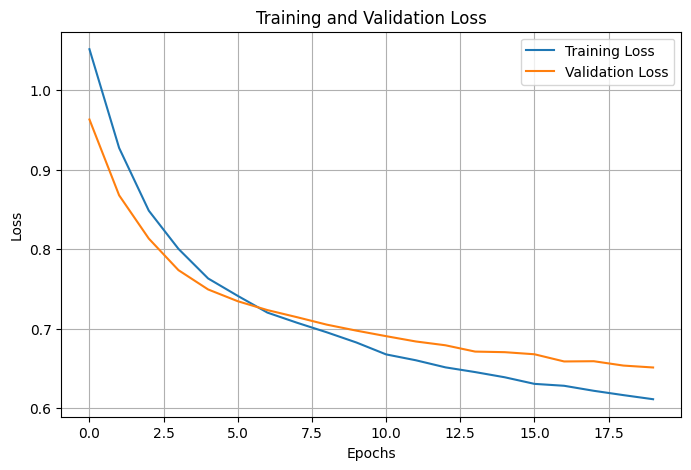

In [ ]:
plot_loss_curves(history1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Predictions shape: (203, 3)
y_val shape: (203,)

=== Evaluation Metrics for model1_baseline ===

Classification Report:
               precision    recall  f1-score   support

           0       0.27      1.00      0.43        55
           1       0.00      0.00      0.00        81
           2       0.00      0.00      0.00        67

    accuracy                           0.27       203
   macro avg       0.09      0.33      0.14       203
weighted avg       0.07      0.27      0.12       203


Detailed Metrics:
Model Name: model1_baseline
Optimizer: adam
Regularizer: None
Early Stopping: No
Learning Rate: 0.0010
Epochs Planned: 20
Epochs Trained: 20
Num Layers: 3
Dropout: 0
Accuracy: 0.2709
Precision: 0.0734
Recall: 0.2709
F1 Score: 0.1155
Training Accuracy: 0.6941
Validation Accuracy: 0.6897
Training Loss: 0.6111
Validation Loss: 0.6510


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


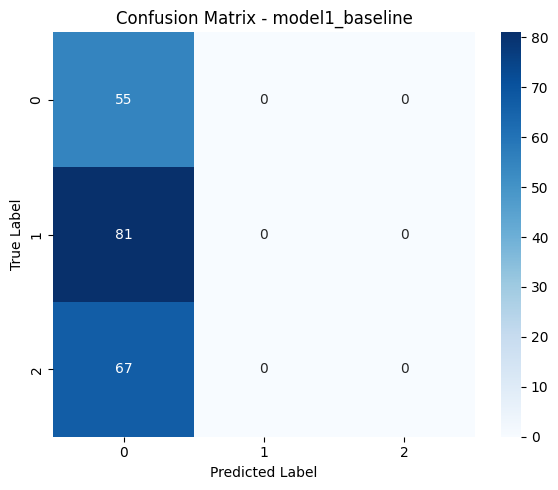

In [ ]:
evaluate_model(model1, X_test, y_test, config=config1)


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [ ]:
# ✅ Instance 1: Baseline model (no optimizations)
model1, history1, config1 = define_model(input_shape=(X_train_scaled.shape[1],),
    optimizer_name='adam',
    regularization_type=None,
    early_stopping=False,
    dropout=0.0,
    learning_rate=0.001,
    epochs=20,
    X_train=X_train_scaled,
    y_train=y_train,
    X_val=X_val_scaled,
    y_val=y_val,
    model_name='model1_baseline'
)

model1.save('saved_models/model1_baseline.h5', include_optimizer=False)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3850 - loss: 1.1480 - val_accuracy: 0.5369 - val_loss: 0.9766
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5375 - loss: 0.9422 - val_accuracy: 0.6158 - val_loss: 0.8677
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6111 - loss: 0.8451 - val_accuracy: 0.6305 - val_loss: 0.8153
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6366 - loss: 0.8006 - val_accuracy: 0.6158 - val_loss: 0.7867
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6439 - loss: 0.7466 - val_accuracy: 0.6453 - val_loss: 0.7644
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6580 - loss: 0.7293 - val_accuracy: 0.6601 - val_loss: 0.7466
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6823 - loss: 0.6795 - val_accuracy: 0.6552 - val_loss: 0.7334
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6864 - loss: 0.6753 - val_accuracy: 0.6305 - val_loss: 0.7263
Ep

In [ ]:
# Get the final training loss (last epoch)
final_train_loss = history1.history['loss'][-1]

# Get the final validation loss (last epoch)
final_val_loss = history1.history['val_loss'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Loss: 0.6089
Final Validation Loss: 0.6557


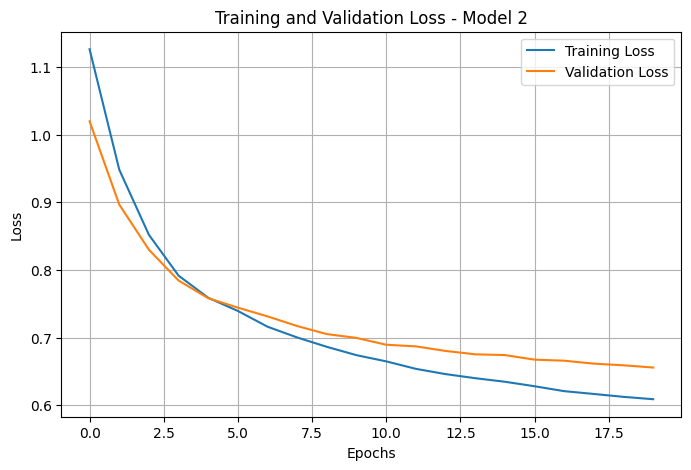

X_val_scaled shape: (203, 8)
y_val shape: (203,)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report for Model 1:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        54
           1       0.71      0.79      0.75        82
           2       0.61      0.51      0.55        67

    accuracy                           0.70       203
   macro avg       0.70      0.70      0.70       203
weighted avg       0.70      0.70      0.70       203



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Sanity check shape match
print(f"X_val_scaled shape: {X_val_scaled.shape}")
print(f"y_val shape: {y_val.shape}")

# Predict
y_pred_prob = model1.predict(X_val_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification report using correct labels
print("Classification Report for Model 1:")
print(classification_report(y_val, y_pred))


In [ ]:
# ✅ Instance 2
model2, history2, config2 = define_model(input_shape=(X_train_scaled.shape[1],),
    optimizer_name='adam',
    regularization_type='l2',
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.0005,
    epochs=30,
    X_train=X_train_scaled,
    y_train=y_train,
    X_val=X_val_scaled,
    y_val=y_val,
    model_name='model2_opt_l2_dropout'
)

model2.save('saved_models/model2_opt_l2_dropout.h5', include_optimizer=False)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3803 - loss: 1.7166 - val_accuracy: 0.3645 - val_loss: 1.6329
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4034 - loss: 1.6232 - val_accuracy: 0.5271 - val_loss: 1.5375
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5517 - loss: 1.5258 - val_accuracy: 0.6010 - val_loss: 1.4656
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5477 - loss: 1.4944 - val_accuracy: 0.6158 - val_loss: 1.4060
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5545 - loss: 1.4092 - val_accuracy: 0.6207 - val_loss: 1.3587
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6227 - loss: 1.3589 - val_accuracy: 0.6010 - val_loss: 1.3184
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6018 - loss: 1.3181 - val_accuracy: 0.6010 - val_loss: 1.2850
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5844 - loss: 1.2861 - val_accuracy: 0.5911 - val_loss: 1.2544
E

In [ ]:
# Get the final training loss (last epoch)
final_train_loss = history2.history['loss'][-1]

# Get the final validation loss (last epoch)
final_val_loss = history2.history['val_loss'][-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Loss: 0.9197
Final Validation Loss: 0.9152


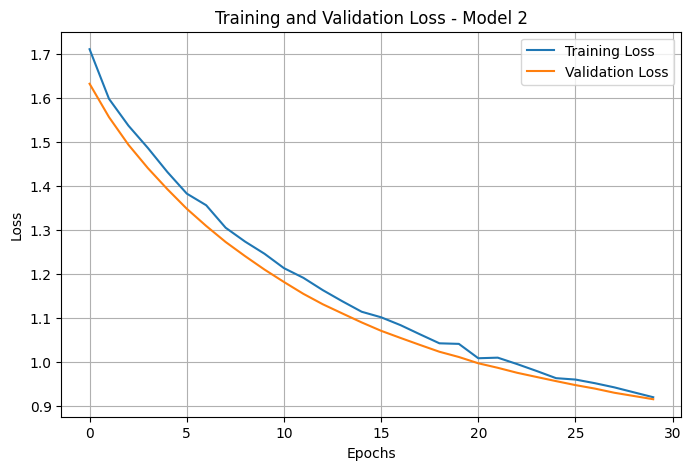

X_val_scaled shape: (203, 8)
y_val shape: (203,)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        54
           1       0.71      0.89      0.79        82
           2       0.65      0.45      0.53        67

    accuracy                           0.70       203
   macro avg       0.70      0.69      0.69       203
weighted avg       0.70      0.70      0.69       203



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Sanity check shape match
print(f"X_val_scaled shape: {X_val_scaled.shape}")
print(f"y_val shape: {y_val.shape}")

# Predict
y_pred_prob = model2.predict(X_val_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification report using correct labels
print("Classification Report for Model 2:")
print(classification_report(y_val, y_pred))


In [ ]:
# ✅ Instance 3
model3, history3, config3 = define_model(input_shape=(X_train_scaled.shape[1],),
    optimizer_name='rmsprop',
    regularization_type='l1',   # L1 regularization
    early_stopping=False,       # ❌ Early stopping disabled
    dropout=0.2,
    learning_rate=0.0002,
    epochs=25,
    X_train=X_train_scaled,
    y_train=y_train,
    X_val=X_val_scaled,
    y_val=y_val,
    model_name='model3_opt_l1_rmsprop'
)

model3.save('saved_models/model3_opt_l1_rmsprop.h5', include_optimizer=False)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3112 - loss: 4.4287 - val_accuracy: 0.3695 - val_loss: 4.3284
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3435 - loss: 4.3183 - val_accuracy: 0.3941 - val_loss: 4.2312
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3701 - loss: 4.2324 - val_accuracy: 0.4384 - val_loss: 4.1409
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4134 - loss: 4.1385 - val_accuracy: 0.4926 - val_loss: 4.0541
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4359 - loss: 4.0389 - val_accuracy: 0.5271 - val_loss: 3.9702
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5286 - loss: 3.9541 - val_accuracy: 0.5714 - val_loss: 3.8876
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5281 - loss: 3.8763 - val_accuracy: 0.5911 - val_loss: 3.8072
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5744 - loss: 3.7720 - val_accuracy: 0.5961 - val_loss: 3.7292
Ep

In [ ]:
# Final training loss
final_train_loss_3 = history3.history['loss'][-1]

# Final validation loss
final_val_loss_3 = history3.history['val_loss'][-1]

print(f"Final Training Loss (Model 3): {final_train_loss_3:.4f}")
print(f"Final Validation Loss (Model 3): {final_val_loss_3:.4f}")


Final Training Loss (Model 3): 2.5964
Final Validation Loss (Model 3): 2.5645


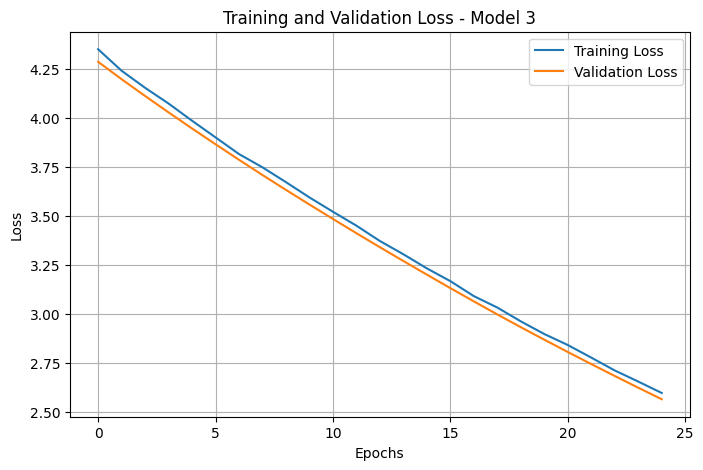

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report for Model 3:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        54
           1       0.65      0.82      0.72        82
           2       0.58      0.43      0.50        67

    accuracy                           0.67       203
   macro avg       0.68      0.67      0.67       203
weighted avg       0.67      0.67      0.67       203



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict probabilities
y_pred_prob = model3.predict(X_val_scaled)

# Convert probabilities to class predictions (assuming binary classification with sigmoid output)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("Classification Report for Model 3:")
print(classification_report(y_val, y_pred))



In [ ]:
# ✅ Instance 4
model4, history4, config4 = define_model(input_shape=(X_train_scaled.shape[1],),
    optimizer_name='adam',
    regularization_type='l2',
    early_stopping=True,
    dropout=0.4,
    learning_rate=0.0003,
    epochs=35,
     X_train=X_train_scaled,
    y_train=y_train,
    X_val=X_val_scaled,
    y_val=y_val,
    model_name='model4_opt_deep_l2'
)

model4.save('saved_models/model4_opt_deep_l2.h5', include_optimizer=False)


Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3394 - loss: 1.6898 - val_accuracy: 0.4483 - val_loss: 1.6348
Epoch 2/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3904 - loss: 1.6557 - val_accuracy: 0.5271 - val_loss: 1.5787
Epoch 3/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4692 - loss: 1.5720 - val_accuracy: 0.5616 - val_loss: 1.5302
Epoch 4/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4736 - loss: 1.5528 - val_accuracy: 0.5764 - val_loss: 1.4884
Epoch 5/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5649 - loss: 1.4855 - val_accuracy: 0.5665 - val_loss: 1.4500
Epoch 6/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5491 - loss: 1.4677 - val_accuracy: 0.5813 - val_loss: 1.4160
Epoch 7/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5687 - loss: 1.4283 - val_accuracy: 0.6207 - val_loss: 1.3838
Epoch 8/35
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5706 - loss: 1.4136 - val_accuracy: 0.6404 - val_loss: 1.3545
Ep

In [ ]:
# Final training loss
final_train_loss_4 = history4.history['loss'][-1]

# Final validation loss
final_val_loss_4 = history4.history['val_loss'][-1]

print(f"Final Training Loss (Model 4): {final_train_loss_4:.4f}")
print(f"Final Validation Loss (Model 4): {final_val_loss_4:.4f}")


Final Training Loss (Model 4): 1.0205
Final Validation Loss (Model 4): 0.9922


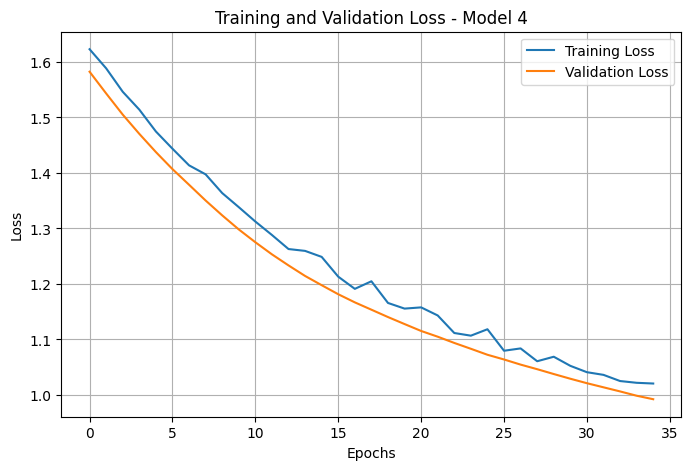

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report for Model 4:
              precision    recall  f1-score   support

           0       0.68      0.78      0.72        54
           1       0.71      0.89      0.79        82
           2       0.66      0.37      0.48        67

    accuracy                           0.69       203
   macro avg       0.68      0.68      0.66       203
weighted avg       0.68      0.69      0.67       203



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

plt.figure(figsize=(8,5))
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Predict probabilities
y_pred_prob = model4.predict(X_val_scaled)

# Convert probabilities to class predictions (assuming binary classification with sigmoid output)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("Classification Report for Model 4:")
print(classification_report(y_val, y_pred))



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_model_results(model, history, config, X_test, y_test):
    plt.figure(figsize=(15, 10))
    plt.suptitle(f"Results for {config['model_name']}", y=1.02, fontsize=16)

    # Plot loss
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training History - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Training History - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Predict classes
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, 3)
    class_names = [f"Class {i}" for i in range(y_pred_prob.shape[1])]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # ROC curve for multiclass
    y_test_bin = label_binarize(y_test, classes=range(y_pred_prob.shape[1]))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

    plt.subplot(2, 2, 4)
    for i, color in zip(range(y_pred_prob.shape[1]), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of {class_names[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    # Print classification report
    print(f"\nClassification Report for {config['model_name']}:")
    print(classification_report(y_test, y_pred, target_names=class_names))




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


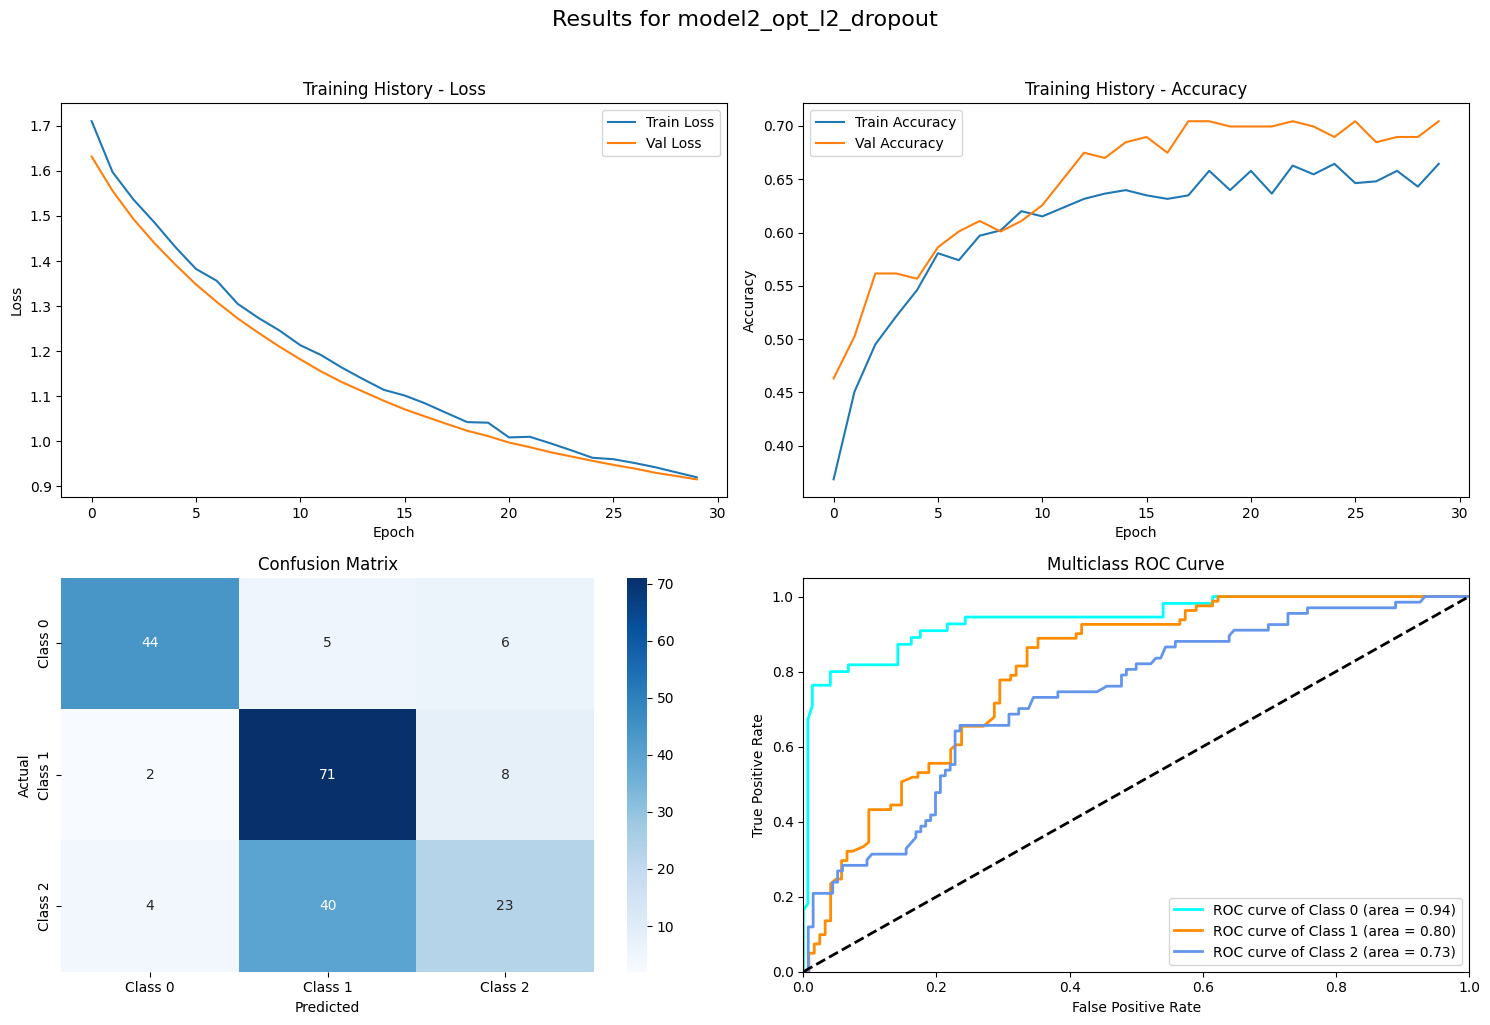


Classification Report for model2_opt_l2_dropout:
              precision    recall  f1-score   support

     Class 0       0.88      0.80      0.84        55
     Class 1       0.61      0.88      0.72        81
     Class 2       0.62      0.34      0.44        67

    accuracy                           0.68       203
   macro avg       0.70      0.67      0.67       203
weighted avg       0.69      0.68      0.66       203

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


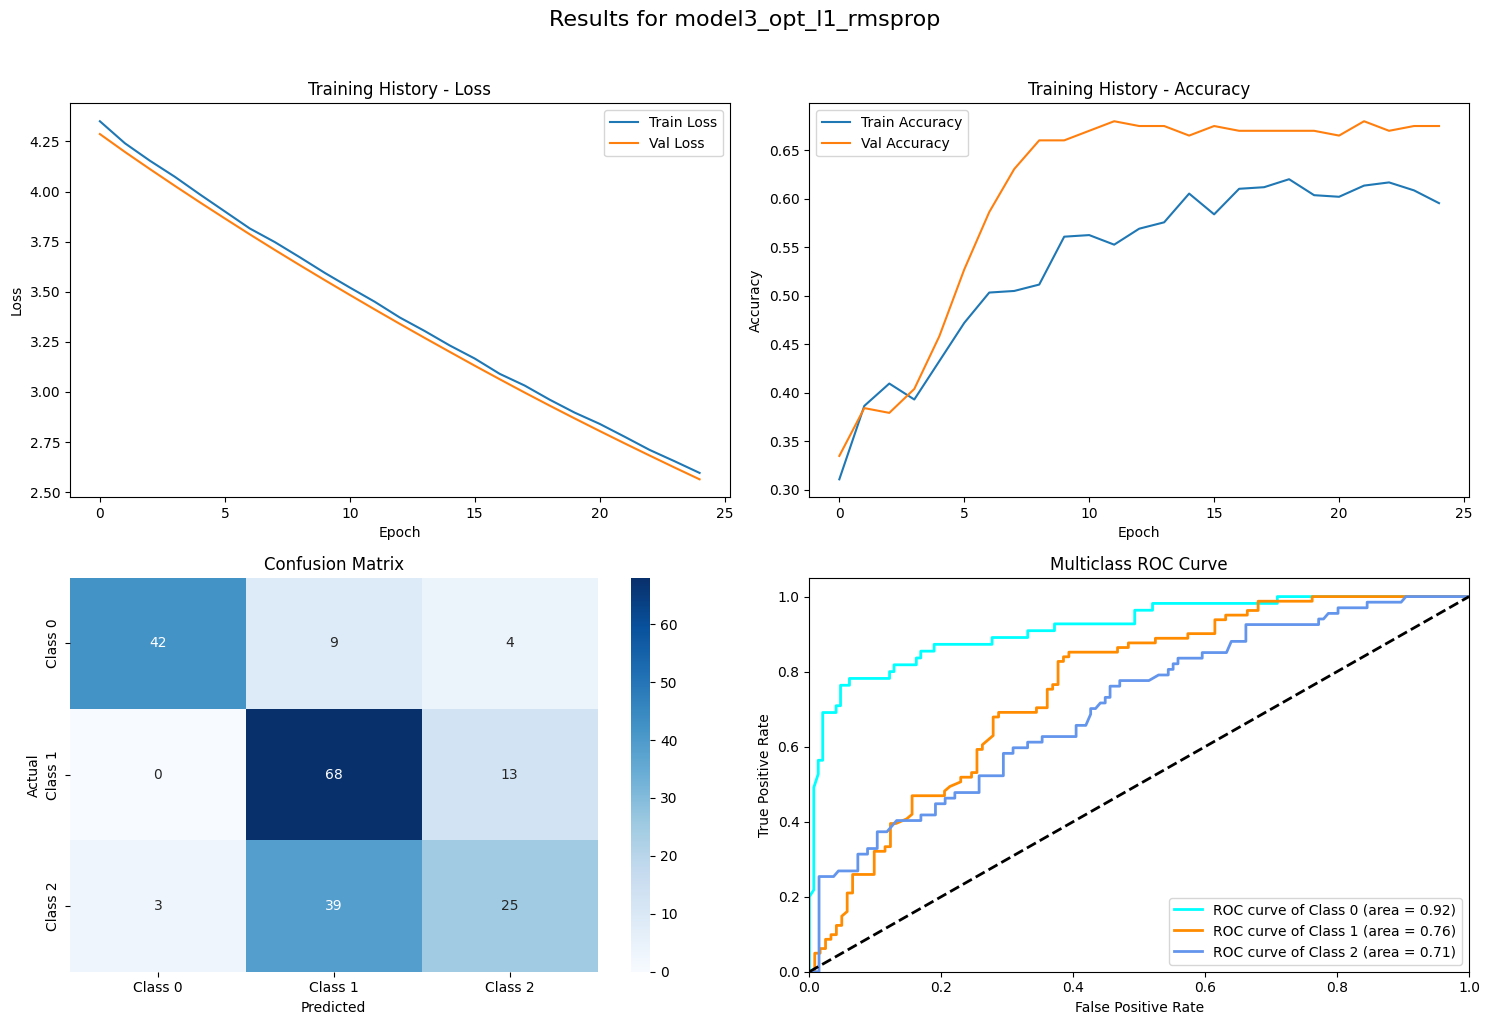


Classification Report for model3_opt_l1_rmsprop:
              precision    recall  f1-score   support

     Class 0       0.93      0.76      0.84        55
     Class 1       0.59      0.84      0.69        81
     Class 2       0.60      0.37      0.46        67

    accuracy                           0.67       203
   macro avg       0.70      0.66      0.66       203
weighted avg       0.68      0.67      0.65       203

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


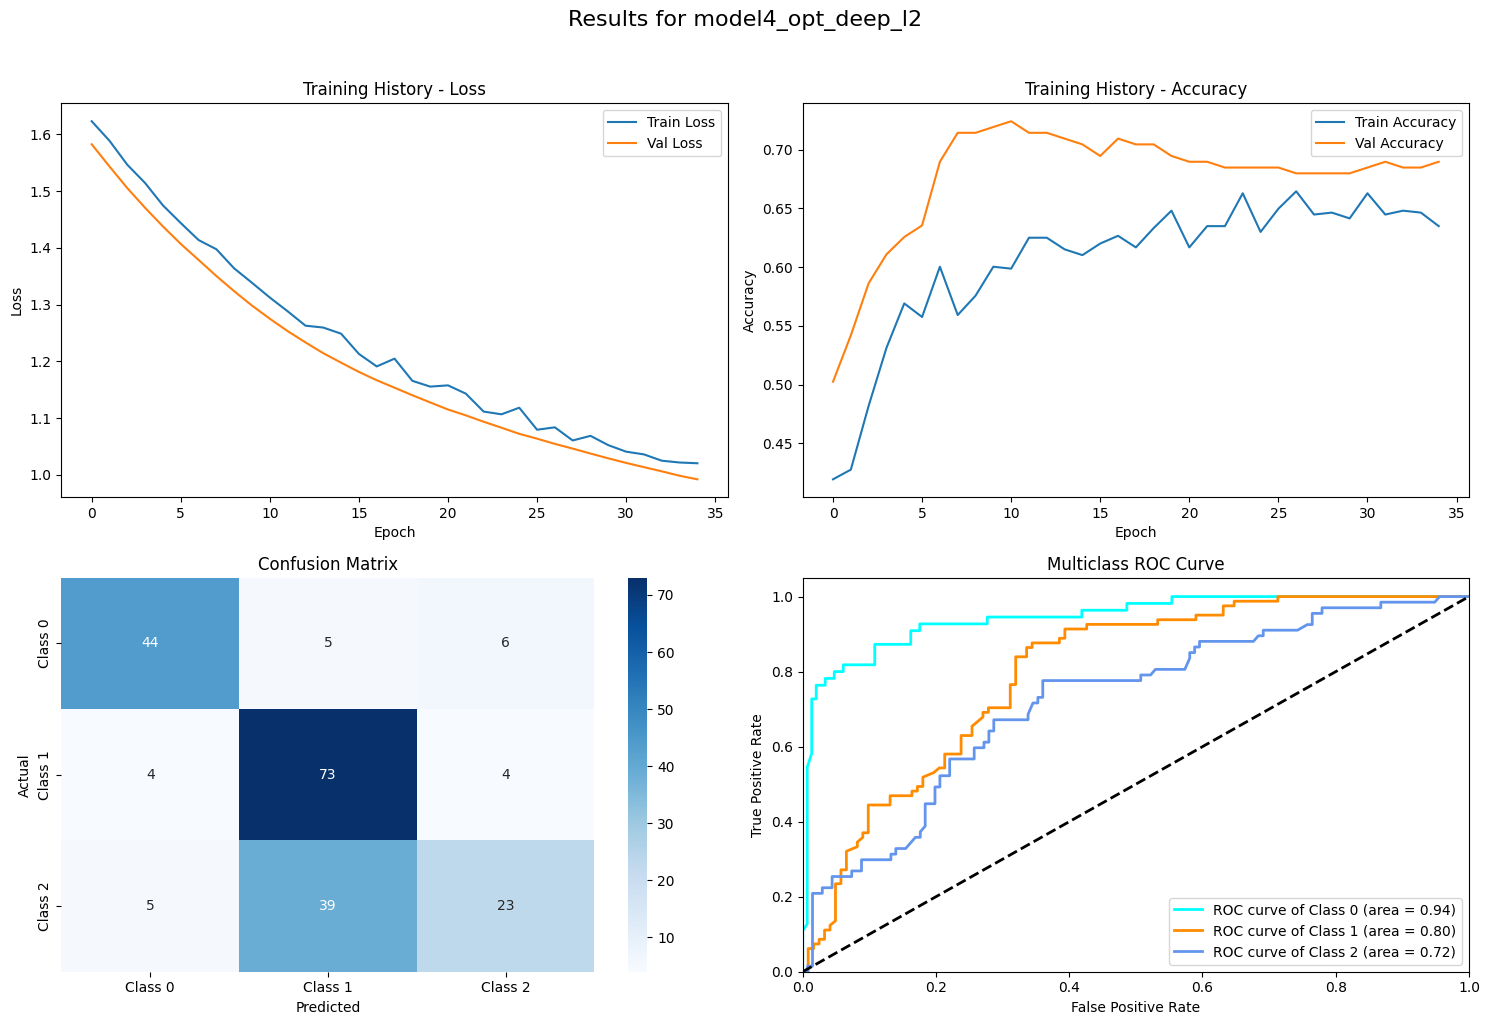


Classification Report for model4_opt_deep_l2:
              precision    recall  f1-score   support

     Class 0       0.83      0.80      0.81        55
     Class 1       0.62      0.90      0.74        81
     Class 2       0.70      0.34      0.46        67

    accuracy                           0.69       203
   macro avg       0.72      0.68      0.67       203
weighted avg       0.70      0.69      0.67       203



In [ ]:
plot_model_results(model2, history2, config2, X_test_scaled, y_test)
plot_model_results(model3, history3, config3, X_test_scaled, y_test)
plot_model_results(model4, history4, config4, X_test_scaled, y_test)


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np

def evaluate_multiclass(y_true, y_pred_probs):
    y_pred = np.argmax(y_pred_probs, axis=1)  # Multiclass prediction
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    loss = log_loss(y_true, y_pred_probs)
    return acc, f1, prec, rec, loss


model_results = {}


for i, model in enumerate([model1, model2, model3, model4], 1):
    y_pred_prob = model.predict(X_test_scaled)
    acc, f1, prec, rec, loss = evaluate_multiclass(y_test, y_pred_prob)
    model_results[f"model{i}"] = {
        'accuracy': acc,
        'f1': f1,
        'precision': prec,
        'recall': rec,
        'loss': loss
    }
    print(f"Model{i} - Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, Loss: {loss:.4f}")


best_model_name = max(model_results, key=lambda name: model_results[name]['accuracy'])
best_metrics = model_results[best_model_name]

print(f"\n✅ Best Model: {best_model_name}")
print(f"F1 Score: {best_metrics['f1']:.4f}, Accuracy: {best_metrics['accuracy']:.4f}, Loss: {best_metrics['loss']:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model1 - Accuracy: 0.6798, F1: 0.6743, Precision: 0.6823, Recall: 0.6798, Loss: 0.6748
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Model2 - Accuracy: 0.6650, F1: 0.6501, Precision: 0.6678, Recall: 0.6650, Loss: 0.7292
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Model3 - Accuracy: 0.6355, F1: 0.5928, Precision: 0.6665, Recall: 0.6355, Loss: 0.8597
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Model4 - Accuracy: 0.6897, F1: 0.6643, Precision: 0.7100, Recall: 0.6897, Loss: 0.7436

✅ Best Model: model4
F1 Score: 0.6643, Accuracy: 0.6897, Loss: 0.7436


In [ ]:
import os
import joblib
import numpy as np
from tensorflow.keras.models import load_model, Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from joblib import load

def evaluate_multiclass(y_true, y_pred_probs):
    y_pred = np.argmax(y_pred_probs, axis=1) if y_pred_probs.ndim > 1 else y_pred_probs
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    loss = log_loss(y_true, y_pred_probs)
    return acc, f1, prec, rec, loss

def save_best_model(model, base_path='saved_models/best_model'):
    if isinstance(model, Model):  # Keras model
        save_path = base_path + '.h5'
        model.save(save_path)
        print(f"✅ Keras model saved at '{save_path}'")
    else:  # Sklearn model
        save_path = base_path + '.pkl'
        joblib.dump(model, save_path)
        print(f"✅ Sklearn model saved at '{save_path}'")
    return save_path

# Load Keras models
keras_model_paths = {
    'model1': 'saved_models/model1_baseline.h5',
    'model2': 'saved_models/model2_opt_l2_dropout.h5',
    'model3': 'saved_models/model3_opt_l1_rmsprop.h5',
    'model4': 'saved_models/model4_opt_deep_l2.h5',
}
keras_models = {name: load_model(path) for name, path in keras_model_paths.items()}

model_results = {}

# Evaluate Keras models
for name, model in keras_models.items():
    y_pred_prob = model.predict(X_test_scaled)
    acc, f1, prec, rec, loss = evaluate_multiclass(y_test, y_pred_prob)
    model_results[name] = {
        'model': model,
        'accuracy': acc,
        'f1': f1,
        'precision': prec,
        'recall': rec,
        'loss': loss
    }
    print(f"{name} - Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, Loss: {loss:.4f}")

# Evaluate Random Forest
try:
    rf_model = load('best_randomforest.joblib')
    y_pred_prob = rf_model.predict_proba(X_test_scaled)
    acc, f1, prec, rec, loss = evaluate_multiclass(y_test, y_pred_prob)
    model_results['random_forest'] = {
        'model': rf_model,
        'accuracy': acc,
        'f1': f1,
        'precision': prec,
        'recall': rec,
        'loss': loss
    }
    print(f"random_forest - Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, Loss: {loss:.4f}")
except Exception as e:
    print(f"⚠️ Could not evaluate random forest: {e}")

# Find best model based on F1 score
best_model_name = max(model_results, key=lambda name: model_results[name]['f1'])
best_model = model_results[best_model_name]['model']
best_metrics = model_results[best_model_name]

# Save the best model
save_best_model(best_model, base_path='saved_models/best_model')

print(f"\n🏆 Best Model: **{best_model_name}**")
print(f"F1 Score: {best_metrics['f1']:.4f}, Accuracy: {best_metrics['accuracy']:.4f}, Loss: {best_metrics['loss']:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
model1 - Accuracy: 0.6798, F1: 0.6743, Precision: 0.6823, Recall: 0.6798, Loss: 0.6748
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
model2 - Accuracy: 0.6650, F1: 0.6501, Precision: 0.6678, Recall: 0.6650, Loss: 0.7292
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
model3 - Accuracy: 0.6355, F1: 0.5928, Precision: 0.6665, Recall: 0.6355, Loss: 0.8597
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
model4 - Accuracy: 0.6897, F1: 0.6643, Precision: 0.7100, Recall: 0.6897, Loss: 0.7436
random_forest - Accuracy: 0.8374, F1: 0.8384, Precision: 0.8417, Recall: 0.8374, Loss: 0.4179
✅ Sklearn model saved at 'saved_models/best_model.pkl'

🏆 Best Model: **random_forest**
F1 Score: 0.8384, Accuracy: 0.8374, Loss: 0.4179


In [ ]:
try:
    y_pred_proba = best_model.predict(X_test_scaled)
    if y_pred_proba.ndim == 1 or y_pred_proba.shape[1] == 1:
        # Binary case
        y_pred = (y_pred_proba.flatten() > 0.5).astype(int)
    else:
        # Multiclass case
        y_pred = np.argmax(y_pred_proba, axis=1)
except AttributeError:
    # Sklearn model
    y_pred_proba = best_model.predict_proba(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)

print("Sample predictions:", y_pred[:10])


Sample predictions: [1 1 0 1 1 0 1 1 1 1]


Congratulations!!
